In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from celluloid import Camera
from pygmo import hypervolume
import numpy as np

In [2]:
data = pd.read_csv('../log/third_experiment.csv', names = ['dataset', 'nodes', 'inutility', 'disclosure_averseness', 'performance', 'seed', 'generation', 'timing'])

In [3]:
data

,dataset,nodes,inutility,disclosure_averseness,performance,seed,generation,timing
0,concrete_strength,1481,"[0.06427749179302222, 0.060254718704270405, 0....","[0.35373134328358224, 0.4960199004975124, 0.35...","[[[0.23484268162496147, 0.34874193448897, 0.31...",0,0,16.301345
1,concrete_strength,1650,"[0.01026718900315124, 0.043541084778797895, 0....","[0.5, 0.3288557213930348, 0.40547263681592044]","[[[0.17405006787065827, 0.2866206580789426, 0....",0,1,11.988384
2,concrete_strength,1866,"[0.010299785682408663, 0.04265113795630368, 0....","[0.5, 0.3288557213930348, 0.40547263681592044]","[[[0.1855338218490002, 0.28670016906056545, 0....",0,2,12.243606
3,concrete_strength,1553,"[0.04237004686172527, 0.036459614263352313, 0....","[0.3288557213930348, 0.40547263681592044, 0.35...","[[[0.1486166658577589, 0.220344916700417, 0.20...",0,3,11.436730
4,concrete_strength,1752,"[0.045689786888042844, 0.03706733940631779, 0....","[0.3288557213930348, 0.40547263681592044, 0.40...","[[[0.15031482142657784, 0.22324422224742585, 0...",0,4,11.467331
...,...,...,...,...,...,...,...,...
2015,bioav,39982,"[0.005839036647373619, 0.002530555179722005, 1...","[0.0069832402234636356, 0.0069832402234637075,...","[[[0.5110489316159594, 0.4817600975306685, 0.4...",4,96,84.671273
2016,bioav,39728,"[0.0003115033616643559, 0.00045130676369037337]","[0.11033519553072625, 0.0069832402234636356]","[[[0.5267479597807387, 0.4617725709719333, 0.4...",4,97,84.591037
2017,bioav,40290,[4.502429671593422e-06],[0.0069832402234636356],"[[[0.5235478815442094, 0.4703967045442241, 0.4...",4,98,85.375975
2018,bioav,40058,[0.0002615375444786072],[0.0069832402234636356],"[[[0.5227316832507802, 0.47195467965090376, 0....",4,99,84.129391


In [4]:
datas = data.dataset.unique()

In [5]:
def calculate_hypervolume(row):
    front = list(zip(eval(row['inutility']), eval(row['disclosure_averseness'])))
    hv = hypervolume(front)
    ref_point = [2, 0.5000001]
    # try:
    return hv.compute(ref_point)
    # except:
    #     return 0
    

In [6]:
def get_percentiles(row):
    x = eval(row['inutility'])
    idxs = []
    for p in [25, 50, 75]:
        pcen=np.percentile(x,p,interpolation='nearest')
        idxs.append(abs(x-pcen).argmin())
    return eval(row['inutility'])[idxs[0]], eval(row['inutility'])[idxs[1]], eval(row['inutility'])[idxs[2]], \
            eval(row['disclosure_averseness'])[idxs[0]], eval(row['disclosure_averseness'])[idxs[1]], eval(row['disclosure_averseness'])[idxs[2]]

In [7]:
data['percentiles'] = data.apply(get_percentiles, axis = 1)

In [8]:
data[['inutlity_25', 'inutlity_50', 'inutlity_75', 'disclosure_averseness_25',
      'disclosure_averseness_50','disclosure_averseness_75']]                   = data['percentiles'].tolist()

In [9]:
data['hypervolume_indicator'] = data.apply(calculate_hypervolume, axis = 1)

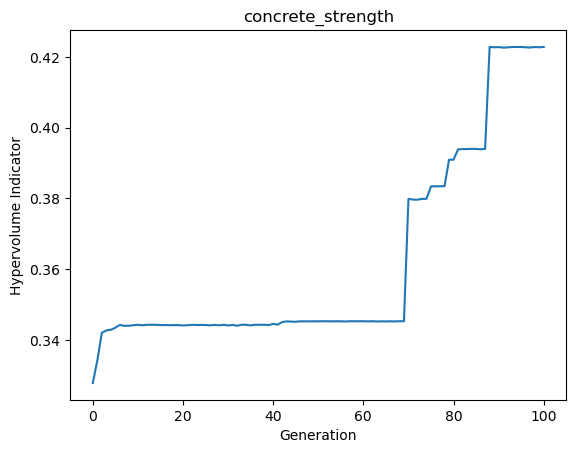

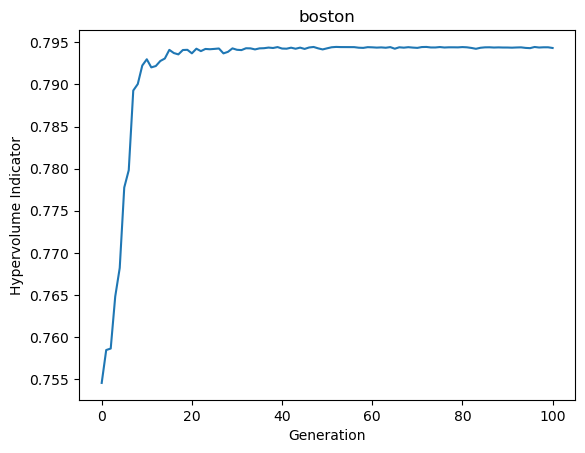

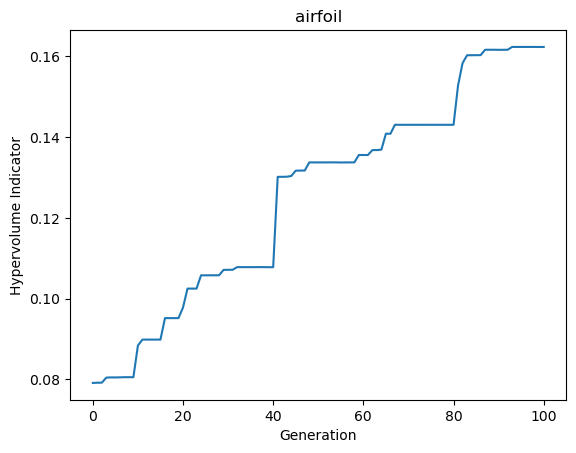

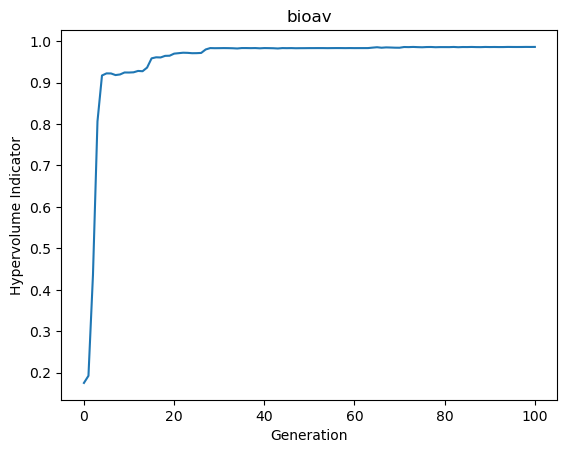

In [10]:
for dataset in datas:
    selected = data[(data['dataset'] == dataset)][['generation', 'hypervolume_indicator']].groupby('generation').median()

    plt.plot(selected.index, selected['hypervolume_indicator'])
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    
    plt.show()


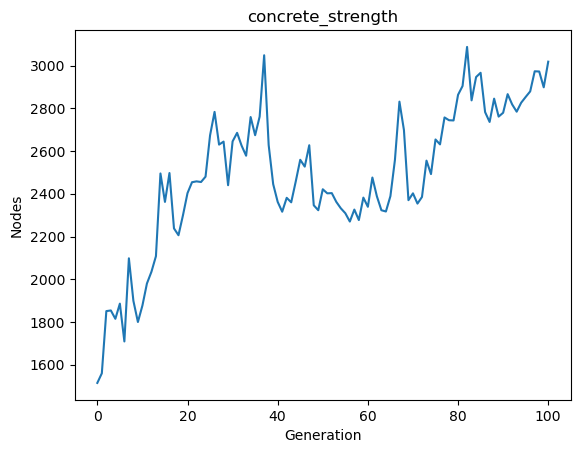

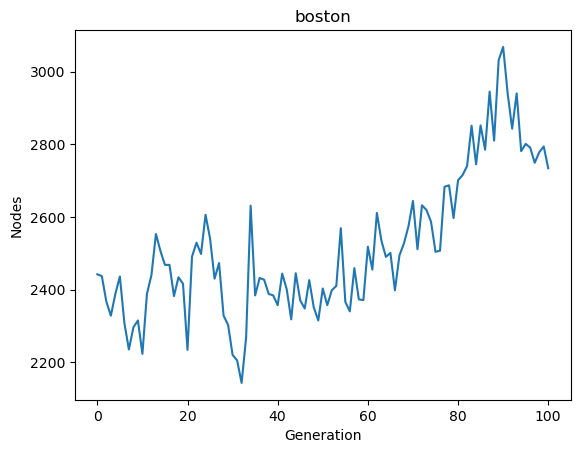

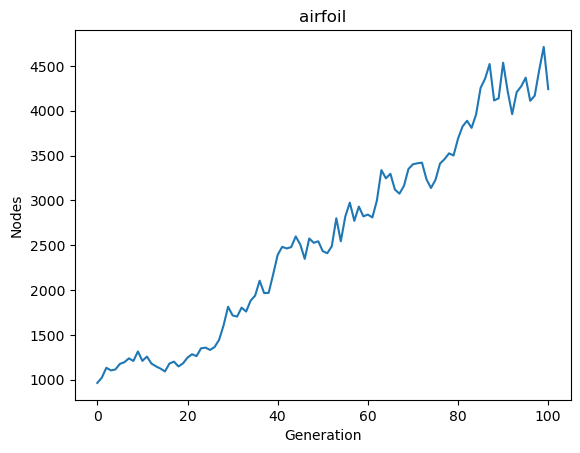

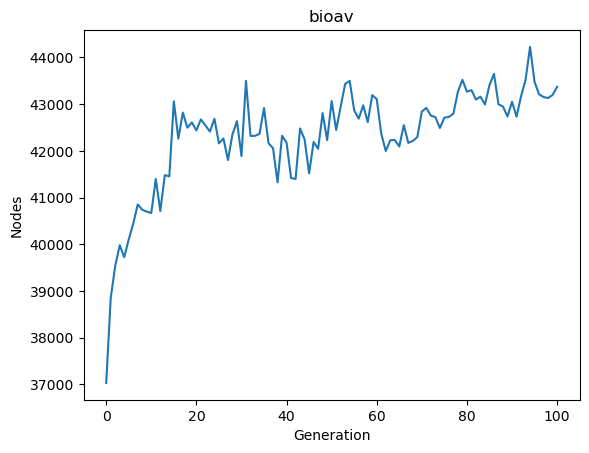

In [15]:
for dataset in datas:
    selected = data[(data['dataset'] == dataset)][['generation', 'nodes']].groupby('generation').median()

    plt.plot(selected.index, selected['nodes'])
    plt.xlabel('Generation')
    plt.ylabel('Nodes')
    plt.title(dataset)
    
    plt.show()


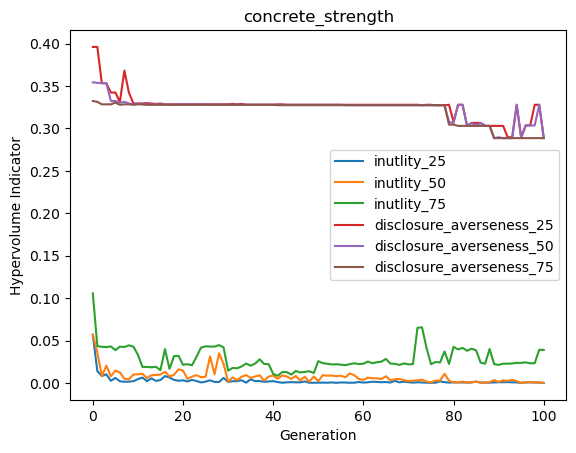

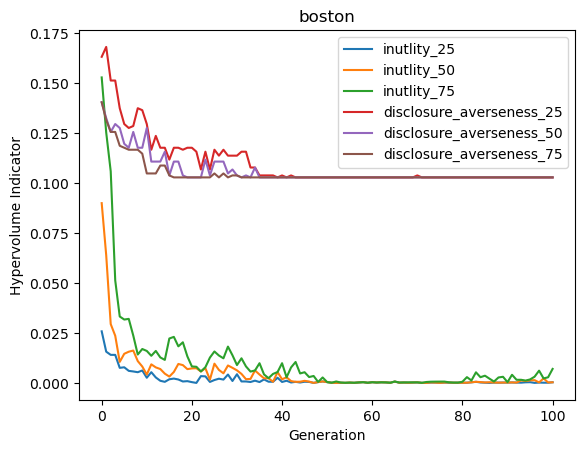

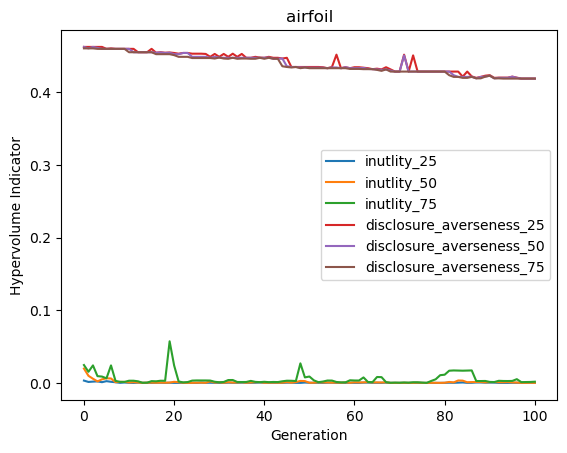

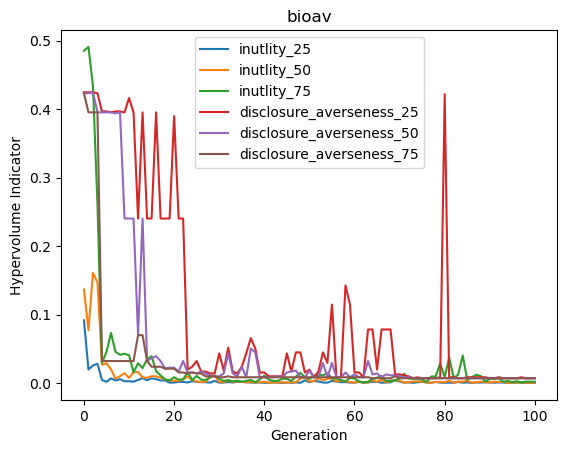

In [11]:
for dataset in datas:
    for metric in ['inutlity_25', 'inutlity_50', 'inutlity_75','disclosure_averseness_25', 'disclosure_averseness_50','disclosure_averseness_75']:
    
        selected = data[(data['dataset'] == dataset)][['generation',metric ]
                                                       ].groupby('generation').median()

        plt.plot(selected.index, selected[metric], label = metric)
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    plt.legend()
    plt.show()


In [12]:
data

,dataset,nodes,inutility,disclosure_averseness,performance,seed,generation,timing,percentiles,inutlity_25,inutlity_50,inutlity_75,disclosure_averseness_25,disclosure_averseness_50,disclosure_averseness_75,hypervolume_indicator
0,concrete_strength,1481,"[0.06427749179302222, 0.060254718704270405, 0....","[0.35373134328358224, 0.4960199004975124, 0.35...","[[[0.23484268162496147, 0.34874193448897, 0.31...",0,0,16.301345,"(0.060254718704270405, 0.06427749179302222, 0....",0.060255,0.064277,0.242237,0.496020,0.353731,0.353731,0.283152
1,concrete_strength,1650,"[0.01026718900315124, 0.043541084778797895, 0....","[0.5, 0.3288557213930348, 0.40547263681592044]","[[[0.17405006787065827, 0.2866206580789426, 0....",0,1,11.988384,"(0.01026718900315124, 0.03605254812111791, 0.0...",0.010267,0.036053,0.043541,0.500000,0.405473,0.328856,0.335545
2,concrete_strength,1866,"[0.010299785682408663, 0.04265113795630368, 0....","[0.5, 0.3288557213930348, 0.40547263681592044]","[[[0.1855338218490002, 0.28670016906056545, 0....",0,2,12.243606,"(0.010299785682408663, 0.039303305587920945, 0...",0.010300,0.039303,0.042651,0.500000,0.405473,0.328856,0.335306
3,concrete_strength,1553,"[0.04237004686172527, 0.036459614263352313, 0....","[0.3288557213930348, 0.40547263681592044, 0.35...","[[[0.1486166658577589, 0.220344916700417, 0.20...",0,3,11.436730,"(0.036459614263352313, 0.04171620553024169, 0....",0.036460,0.041716,0.042370,0.405473,0.355224,0.328856,0.345310
4,concrete_strength,1752,"[0.045689786888042844, 0.03706733940631779, 0....","[0.3288557213930348, 0.40547263681592044, 0.40...","[[[0.15031482142657784, 0.22324422224742585, 0...",0,4,11.467331,"(0.03706733940631779, 0.03838624525050152, 0.0...",0.037067,0.038386,0.045690,0.405473,0.332338,0.328856,0.345660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,bioav,39982,"[0.005839036647373619, 0.002530555179722005, 1...","[0.0069832402234636356, 0.0069832402234637075,...","[[[0.5110489316159594, 0.4817600975306685, 0.4...",4,96,84.671273,"(0.0020083107603793837, 0.002530555179722005, ...",0.002008,0.002531,0.002531,0.107542,0.006983,0.006983,0.985774
2016,bioav,39728,"[0.0003115033616643559, 0.00045130676369037337]","[0.11033519553072625, 0.0069832402234636356]","[[[0.5267479597807387, 0.4617725709719333, 0.4...",4,97,84.591037,"(0.0003115033616643559, 0.0003115033616643559,...",0.000312,0.000312,0.000451,0.110335,0.110335,0.006983,0.985866
2017,bioav,40290,[4.502429671593422e-06],[0.0069832402234636356],"[[[0.5235478815442094, 0.4703967045442241, 0.4...",4,98,85.375975,"(4.502429671593422e-06, 4.502429671593422e-06,...",0.000005,0.000005,0.000005,0.006983,0.006983,0.006983,0.986031
2018,bioav,40058,[0.0002615375444786072],[0.0069832402234636356],"[[[0.5227316832507802, 0.47195467965090376, 0....",4,99,84.129391,"(0.0002615375444786072, 0.0002615375444786072,...",0.000262,0.000262,0.000262,0.006983,0.006983,0.006983,0.985905


In [13]:
baselines = {'concrete_strength': [(0.0006965210703911151, 0.5), (0.3638541738557364, 0.17164179104477614)], 
             'boston': [(0.0004725656277038415, 0.5), (0.3841634369840091, 0.27667984189723316)], 
             'airfoil': [(0.00030401291259806937, 0.5), (0.06335676013464538, 0.43346640053226876)],
             'bioav': [(0.001016650205633074, 0.49999999999999994), (0.126252192300419, 0.356145251396648)]}


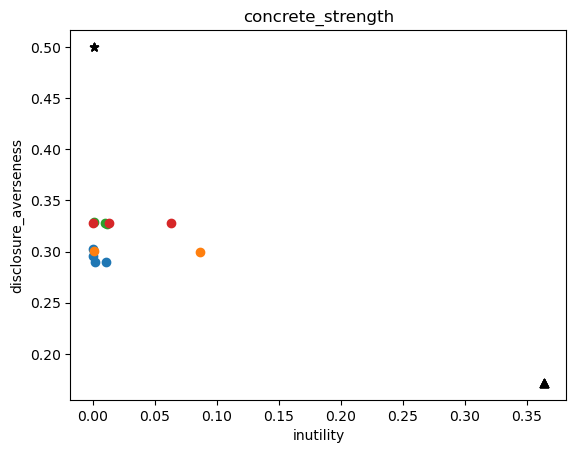

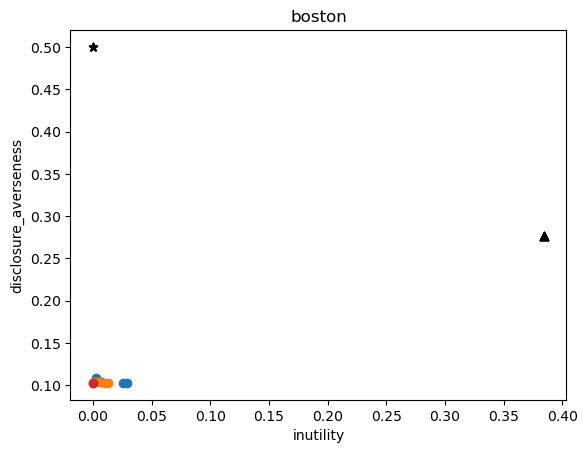

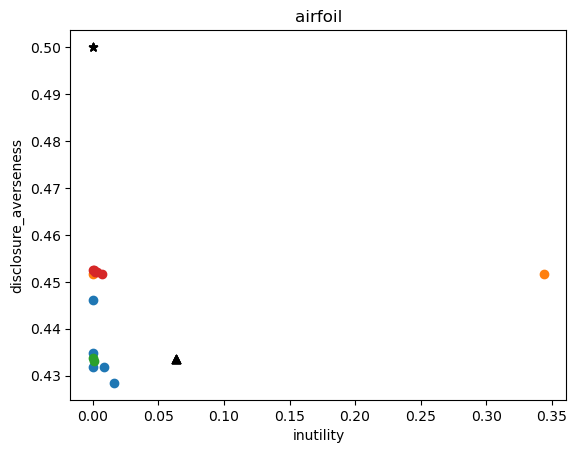

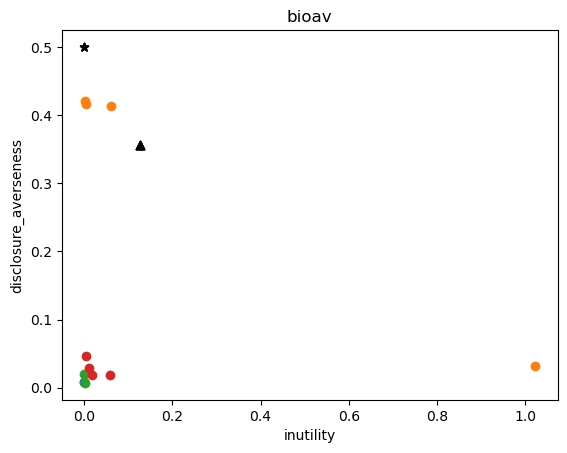

In [14]:
for dataset in datas:
    for seed in range(4):

        selected = data[(data['generation'] == 50) &
            (data['dataset'] == dataset) &
            (data['seed'] == seed)] 
        
        plt.scatter(eval(selected['inutility'].values[0]), eval(selected['disclosure_averseness'].values[0]))

        plt.scatter(baselines[dataset][0][0], baselines[dataset][0][1], marker = "*", color = 'black')
        plt.scatter(baselines[dataset][1][0], baselines[dataset][1][1], marker = "^", color = 'black')
        
    plt.xlabel('inutility')
    plt.ylabel('disclosure_averseness')
    plt.title(dataset)
    plt.show()